# Case Study of Mumbai's Bus Public Transport System

Mumbai's bus transport system is mainly controlled by Brihanmumbai Electric Supply and Transport (BEST). It has a fleet of single, double decker buses and air-conditioned mini buses. BEST runs their buses all over Mumbai and outskirts like Navi Mumbai, Thane and Mira-Bhayandar. There are easily more than 300 routes and more than a thousand bus stops where these buses halt, thus creating a huge network of bus transport. This is a small analysis of the network.  
The data used for the study is scraped from various sources on internet which provided information regarding the bus start and end points, distances and times. With the help of the data we create a graph using *networkx* library and do some basic network analysis of the created Graph.  
NOTE: Some of the bus routes might be changed or stopped altogether based on availability and public response.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Data

In [3]:
routes = pd.read_csv('/content/drive/MyDrive/routes.csv')
routes.head()

,Starting From,Destination,Total Stops,Travel Time,Route Distance (Km),Start Timings from A,Start Timings from B,Stops,Bus number
0,R C Church.,Bandra Reclamation Bus Station.,44.0,1 Hour 40 Minutes.,25.9.,"07:55, 08:17, 08:39, 09:01, 09:23, 09:45, 10:...","06:30, 06:48, 07:06, 07:24, 07:42, 08:00, 08:...","R C Church, Ins Ashwini Hospital, Pilot Bunde...",1
1,Colaba Bus Station.,Santacruz Depot.,33.0,1 Hour 16 Minutes.,NA.,NA,Not Available,"Colaba Bus Station, Sasoon Dock, Strand Cinem...",1 LTD
2,Hutatma Chowk.,Ghatkopar Depot Caseurina.,53.0,1 Hour 8 Minutes.,26.1.,"08:03, 15:15, 15:57, 17:29, 18:16, 19:02, 19:...","07:00, 07:32, 08:05, 08:37, 09:10, 09:42, 17:...","Hutatma Chowk, V B Phadke Chk Metro Dhobi Tal...",10 LTD
3,Ahilyabai Holkar Chowk.,Ahilyabai Holkar Chowk.,11.0,41 Minutes.,3.3.,"08:30, 08:36, 08:42, 08:47, 08:51, 08:54, 08:...",NaN,"Ahilyabai Holkar Chowk, Petroleum House, Jeev...",100
4,Colaba Depot.,Walkeshwar.,26.0,51 Minutes.,9.9.,"06:45, 07:35, 08:06, 08:37, 09:08, 09:45, 10:...","06:50, 07:20, 07:50, 08:20, 08:54, 09:28, 09:...","Colaba Depot, Dr S P Mukherji Chowk Museum, H...",101


This is the scraped data saved in a csv file for ease of use. A simple description of the features in table are as follows  
**Starting From**: Source of the bus  
**Destination**: Upto where is the bus going  
**Total Stops**: Number of stops the bus takes between the source and destination  
**Travel Time**: Total time taken by the bus to reach from source to the destination  
**Route Distance (Km)**: Total Distance covered by the bus over the route  
**Start Timings from A**: The times at which the bus starts journey from the source to destination  
**Start Timings from B**: The times at which the bus starts journey from the destination to the source  
**Stops**: Name of the stops taken between the source and destination  
**Bus number**: Unique identifier for every route by which the travel destination can be recognized  

### Data Preprocessing

In [4]:
routes['Stops'] = routes['Stops'].str.split(',')
routes['Route Distance (Km)'] = routes['Route Distance (Km)'].apply(lambda x: x[:-1])
routes['Route Distance (Km)'] = routes['Route Distance (Km)'].replace(' NA',np.nan)
routes['Route Distance (Km)'] = routes['Route Distance (Km)'].astype(float)
routes['Total Stops'] = routes['Total Stops'].astype(int)
routes['Starting From'] = routes['Starting From'].apply(lambda x: x[:-1])
routes['Destination'] = routes['Destination'].apply(lambda x: x[:-1])
routes['Travel Time'] = routes['Travel Time'].apply(lambda x: x[:-1])
routes['Starting From'] = routes['Starting From'].str.lstrip()
routes['Destination'] = routes['Destination'].str.lstrip()
def strip_spaces(lst):
  final = []
  for i in lst:
    final.append(i.lstrip(' '))
  return final

routes['Stops'] = routes['Stops'].apply(lambda x: strip_spaces(x))
routes.head()

,Starting From,Destination,Total Stops,Travel Time,Route Distance (Km),Start Timings from A,Start Timings from B,Stops,Bus number
0,R C Church,Bandra Reclamation Bus Station,44,1 Hour 40 Minutes,25.9,"07:55, 08:17, 08:39, 09:01, 09:23, 09:45, 10:...","06:30, 06:48, 07:06, 07:24, 07:42, 08:00, 08:...","[R C Church, Ins Ashwini Hospital, Pilot Bunde...",1
1,Colaba Bus Station,Santacruz Depot,33,1 Hour 16 Minutes,NaN,NA,Not Available,"[Colaba Bus Station, Sasoon Dock, Strand Cinem...",1 LTD
2,Hutatma Chowk,Ghatkopar Depot Caseurina,53,1 Hour 8 Minutes,26.1,"08:03, 15:15, 15:57, 17:29, 18:16, 19:02, 19:...","07:00, 07:32, 08:05, 08:37, 09:10, 09:42, 17:...","[Hutatma Chowk, V B Phadke Chk Metro Dhobi Tal...",10 LTD
3,Ahilyabai Holkar Chowk,Ahilyabai Holkar Chowk,11,41 Minutes,3.3,"08:30, 08:36, 08:42, 08:47, 08:51, 08:54, 08:...",NaN,"[Ahilyabai Holkar Chowk, Petroleum House, Jeev...",100
4,Colaba Depot,Walkeshwar,26,51 Minutes,9.9,"06:45, 07:35, 08:06, 08:37, 09:08, 09:45, 10:...","06:50, 07:20, 07:50, 08:20, 08:54, 09:28, 09:...","[Colaba Depot, Dr S P Mukherji Chowk Museum, H...",101


In [5]:

for idx,row in routes.iterrows():
  previous_stop = None
  for i in row['Stops']:
    if previous_stop == i:
      row['Stops'].remove(i)
    previous_stop = i

In [6]:
corrections = {'MPSC/UPSC TRAINING CENTRE BANDRA': 'MPSCUPSC TRAINING CENTRE BANDRA','RUSHI COMPLEX EXTENSION DAHISAR W': 'RUSHI COMPLEX EXTENSION DAHISAR - W','SANTACRUZ STATION E': 'SANTACRUZ STATION EAST','TERNA ENGINEERING COLLEGE KHAIRANE' : 'TERNA ENGINEERING COLLEGE','MITH CHOWKY MALAD':  'MITH CHOWK MALAD','KURLA STATION W' : 'KURLA STATION WEST','MAHIM PHATAK EAST' : 'MAHIM PHATAK'}
for idx,row in routes.iterrows():
  for i in range(len(row['Stops'])):
    if row['Stops'][i].upper() in corrections.keys():
      row['Stops'][i] = corrections[row['Stops'][i].upper()]

### Dataframe analysis

Many Bus routes in Mumbai run from suburban railway stations to sort of distant parts of the city. Suburban railway is still the most used public transport in the city and it mainly runs on 2 lines called 'Central Line' and "Western Line'. There is also a third called 'Harbour Line' which connects Navi Mumbai. As it is a faster mode of travel, usually a lot of bus routes tend to start from these suburban railway stations to outer parts of the city which can be reflected by the basic frequency counting of Sources and Destinations.

In [7]:
sources = {}
starts = routes['Starting From'].value_counts()
for name, count in starts.items():
  if name not in sources.keys():
    sources[name] = count
  else:
    sources[name] += count

ends = routes['Destination'].value_counts()
for name, count in starts.items():
  if name not in sources.keys():
    sources[name] = count
  else:
    sources[name] += count

print('Top 5 sources:')
print(sorted(sources.items(),key=lambda x:x[1],reverse=True)[:5])

Top 5 sources:
[('Kurla Station West', 34), ('Ghatkopar Depot Caseurina', 32), ('Andheri Station West', 30), ('Agarkar Chowk', 28), ('Mantralaya', 28)]


We will take a look as to why these are the more common sources in location based analysis

### Graph Creation
As these are routes, hence they have a specific direction. Also as the bus can start from source as well as the destination, the reverse journey from destination to source can also be considered as a route, thus the network created is an undirected graph.  
We create a graph with the nodes being the Stops and they are linked by edges based on the routes.  
Here a 'count' attribute is also added to each node and edge which for a node signifies how many routes pass through it and or an edge signifies on how many bus routes does that edge lies. Thus becomes an important attribute to find the more important locations on the network.  

In [8]:
G = nx.Graph()
paths = routes['Stops'].tolist()
for path in paths:
  for i in path:
    if i.upper() not in G.nodes():
      G.add_node(i.upper(),count=1)
    else:
      G.nodes[i.upper()]['count'] += 1
for path in paths:
  for i,j in zip(path[:-1],path[1:]):
    if (i.upper(),j.upper()) in G.edges() or (j.upper(),i.upper()) in G.edges():
      G[i.upper()][j.upper()]['count'] += 1
    else:
      G.add_edge(i.upper(),j.upper(),count=1)

### Some basic Network analysis
This includes some analysis purely done on the basis of the graph network created. Geographical analysis would be done in a separate notebook for now.  
Network based analysis means we will try to study how the structure of the network is without giving importance to where the node is positioned ie. irrespective of the geographical aspect.  

#### Connectivity
To begin with, we will check whether there is any disconnected route in the network. By disconnected we mean any route which is not connected to any other route on the network. 

In [9]:
nx.is_connected(G)

True

Thus our network is strongly connected which means you can go from any stop to any other stop in the network.

#### Node degree
Degree is the number of neighbors a node has. A neighbor is defined as a node which has a direct edge with the node of interest. Usually, higher the node degree, more important it is considered. We plot a histogram of the node degree to have an overall understanding of this metric.

<Axes: ylabel='Count'>

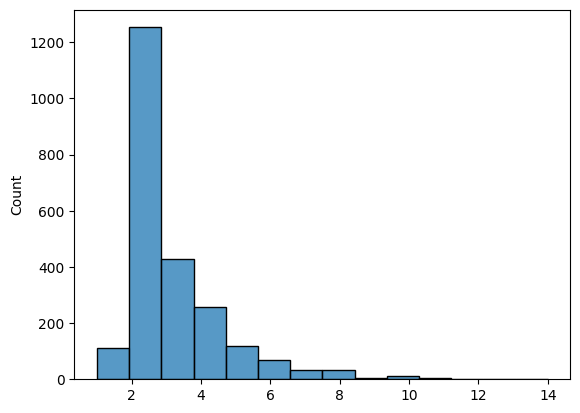

In [10]:
node_degrees = {}
for node in G.nodes():
  node_degrees[node] = G.degree(node)
sns.histplot(list(node_degrees.values()),bins=14)

From the plot we can see many of the nodes have degree 2 which kind of means many that many of the stops appear mostly on a single route. Even though the degree is 2, it doesn't means there is only 1 bus passing through the route. Thus to find this we use the attribute 'count' which is associated with each node while building the graph

Highest node count: ('KHODADAD CIRCLE', 76)
Highest edge count: (('GANDHI MARKET MATUNGA', 'LOKMANYA TILAK HOSPITAL'), 42)


Text(0.5, 1.0, 'Edge count')

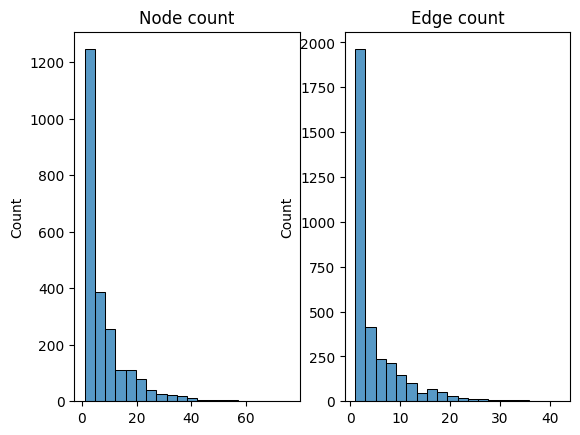

In [11]:
node_count_frequency = nx.get_node_attributes(G,'count')
edge_count_frequency = nx.get_edge_attributes(G,'count')

print('Highest node count:', max(node_count_frequency.items(),key=lambda x:x[1]))
print('Highest edge count:', max(edge_count_frequency.items(),key=lambda x:x[1]))

plt.subplot(1,2,1)
sns.histplot(list(node_count_frequency.values()),bins=20)
plt.title('Node count')

plt.subplot(1,2,2)
sns.histplot(list(edge_count_frequency.values()),bins=20)
plt.title('Edge count')

As it can be seen, many nodes have count 1 and it gradually decreases with values going as high as 76 for 'Khodadad Circle'. This stop has highest number of bus routes halting at the stop. We will take a look at the reason behind this in the geographical analysis notebook.  
Similarly for the edges, the maximum count is 42 between 'Gandhi Market, Matunga' and 'Lokmanya Tilak Hospital'.  
Many of the nodes and edges here also lie around the neighboring cities of Mumbai, this is one reason to why we have a big number of nodes and edges with the count 1, as they probably have less buses on the route, to be precise only 1. 

#### Eccentricity
Eccentricity is the maximum distance between a node and all other nodes. Essentially, for any stop in network it finds the number of stops (nodes) between the stop of interest and the stop farthest from it. We plot a histogram of the eccentricities.  


Maximum Eccentricity of network 73
Minimum Eccentricity of network 37


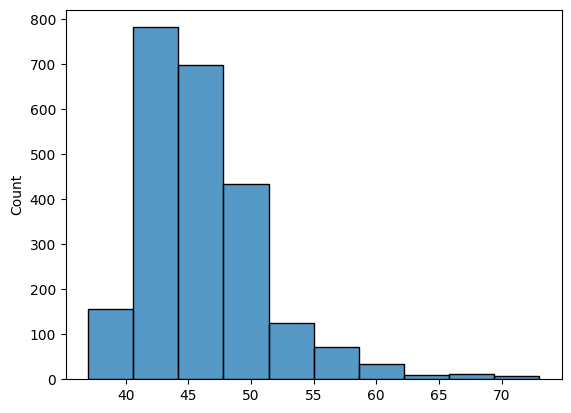

In [12]:
eccentricity = nx.eccentricity(G)
sns.histplot(list(eccentricity.values()),bins=10)
print('Maximum Eccentricity of network',max(eccentricity.values()))
print('Minimum Eccentricity of network',min(eccentricity.values()))

Much of the eccentricity value lies in the range of 40 to 50. For some nodes on the outskirts and which go in the neighboring satellite cities of Navi Mumbai, Thane and Mira-Bhayander, the eccentricity value is higher.  

#### Diameter and Radius
These 2 exists only if the network is connected (there is path from every node to every other node)
Diameter is the maximum distance between any pair of nodes which means it is the distance between the most distant nodes. In terms of eccentrictity, the maximum eccentrictiy of a network is its diameter.  
Talking in terms of non technical terms, Diameter is the longest route (with respect to number of stations) in the transport network between any two stops.  
Radius is the minimum eccentricity of the network. It is basically the minimum distance amongst the maximum distances between any pair of nodes.  





In [13]:
diameter = nx.diameter(G)
radius = nx.radius(G)
print('diameter:',diameter)
print('radius:',radius)

diameter: 73
radius: 37


#### Average Shortest Path Length
This represents the average shortest path length between all pair of nodes. 

In [14]:
nx.average_shortest_path_length(G)

16.379943277556016

The average is smaller as compared to the diameter of the graph. This gives an idea that the many nodes are located close to each other. This can be correlated to the major number of bus stops located in and around central Mumbai where there are many business complexes situated.  

In overall, this is a general network analysis of the Mumbai public bus transport system.
